## FACE RECOGNITION

#### The below project work intends to recognize face of different people from photos provided. This can be used for attendence of students. 

In [ ]:
# installing openc
!pip install opencv-contrib-python

In [1]:
# importing required libraries
import numpy as np
import cv2

#### Here the haarcascade file is used for frontalface detection from a image

In [2]:
face_classifier = cv2.CascadeClassifier('C:\\Users\\singh\\Documents\\Deep Learning Project\FR\\Deep-Learning\\haarcascade_frontalface_default.xml')

#### The dataset is being generated for 12 people here from the webcam. Some of the images of real people are taken and some are from google videos of people in a conversation. This is done to keep variation of images of different types

#### There are total 500 images of each person which is later split into train and validation sets and 20 different images in a separate folder for testing purpose.

In [ ]:
def generate_dataset():
    
    def face_cropped(img):
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(img, 1.3, 5)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            x=x-10
            y=y-10
            cropped_face = img[y:y+h+50, x:x+w+50]
        return cropped_face
    
    cap = cv2.VideoCapture(0)
    img_id = 160
    
    while True:
        ret, frame = cap.read()
        if face_cropped(frame) is not None:
            img_id += 1
            face = cv2.resize(face_cropped(frame), (200,200))
#             face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            file_name_path = "Images for Visualization/" + "GooglePerson1." + str(img_id) + ".jpg"
            cv2.imwrite(file_name_path, face)
            cv2.putText(face, str(img_id), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0),2)
            
            cv2.imshow('Cropped_Face', face)
            if cv2.waitKey(1)==13 or int(img_id)==180: # 13 is the ascii for enter. if you press enter, the loop will end
                break
    cap.release()
    cv2.destroyAllWindows()
    print('Collecting samples is completed!')
generate_dataset()

### Label

#### labels (names) of people extracted from the label

In [20]:
# people_list = ['Pratiksha', 'Sara', 'Shamik', 'Memoona', 'Amin', 'Antonio', 'Ayush', 'Michele', 'GooglePerson1', 'GooglePerson2', 'GooglePerson3', 'GooglePerson4']
people_list = ['Amin', 'Antonio', 'Ayush', 'GooglePerson1', 'GooglePerson2', 'GooglePerson3', 'GooglePerson4', 'Memoona', 'Michele', 'Pratiksha', 'Sara', 'Shamik']

def my_label(image_name):
    
    name = image_name.split('.')[-3]
    ind = people_list.index(name)
    ret_list = [0] * len(people_list)
    ret_list[ind] = 1
    
    return np.array(ret_list)
    

### Create Data

#### Here the data is generated in the required format

In [21]:
import os
from random import shuffle
from tqdm import tqdm

image_folder = 'C:\\Users\\singh\\Documents\\Deep Learning Project\\Face Recognization\\OpenCV-Python\\OpenCV-Python-Series\\src\\data\\'

In [22]:

def my_data():
    data = []
    for img in tqdm(os.listdir(image_folder)):
        path = os.path.join(image_folder, img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         img_data = cv2.imread(path, cv2.IMREAD_COLOR)

        img_data = cv2.resize(img_data, (50,50))
        data.append([np.array(img_data), my_label(img)])
    shuffle(data)
    return data
    

In [23]:
data = my_data()

100%|█████████████████████████████████████████████████████████████████████████████| 5989/5989 [00:23<00:00, 257.10it/s]


### Split train test

In [24]:
train =  data[:5700]
val = data[5700:]

X_train = np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train = [i[1] for i in train]
X_val = np.array([i[0] for i in val]).reshape(-1,50,50,1)
print((X_val.shape))
y_val = [i[1] for i in val]

(5700, 50, 50, 1)
(289, 50, 50, 1)


### MODEL

In [25]:
# !pip install tensorflow

In [26]:
# !pip install tensorflow-datasets

In [27]:
# !pip install tflearn

In [28]:
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import pandas as pd

In [29]:
# tf.reset_default_graph()
tf.compat.v1.reset_default_graph()
convnet = input_data(shape=[50,50,1])
convnet = conv_2d(convnet, 32, 5, activation='relu') # 32-filter, 5-stride so that the filter will move 5 pixel or unit at a time
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet,64, 5, activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,128, 5, activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,64, 5, activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet,32, 5, activation='relu')
convnet = max_pool_2d(convnet,5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8) # to avoid overfitting

convnet = fully_connected(convnet, 12, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')

model = tflearn.DNN(convnet, tensorboard_verbose=1)

model.fit(X_train, y_train, n_epoch=10, validation_set=(X_val, y_val), show_metric=True, run_id='Prat')

Training Step: 899  | total loss: 0.04497 | time: 18.189s
| Adam | epoch: 010 | loss: 0.04497 - acc: 0.9909 -- iter: 5696/5700
Training Step: 900  | total loss: 0.04380 | time: 19.402s
| Adam | epoch: 010 | loss: 0.04380 - acc: 0.9903 | val_loss: 0.04050 - val_acc: 0.9965 -- iter: 5700/5700
--


### Visualization and Prediction

#### The test data from the other folder will be tested using the trained model and some random images will be visualized

In [35]:
def data_for_visualization():
    Vdata = []
    correct_label = []
    print('type', type(correct_label))
    for img in tqdm(os.listdir('Images for Visualization')):
        path = os.path.join('Images for Visualization', img)
        img_num = img.split('.')[1]
        img_label = img.split('.')[0]
        correct_label.append(img_label)
#         print(img_num)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#         img_data = cv2.imread(path)

        img_data = cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
        
#     shuffle(Vdata)
    return(Vdata, correct_label)


In [36]:
Vdata, correct_label =  data_for_visualization()
# print('labels',correct_label)

type <class 'list'>


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1048.64it/s]


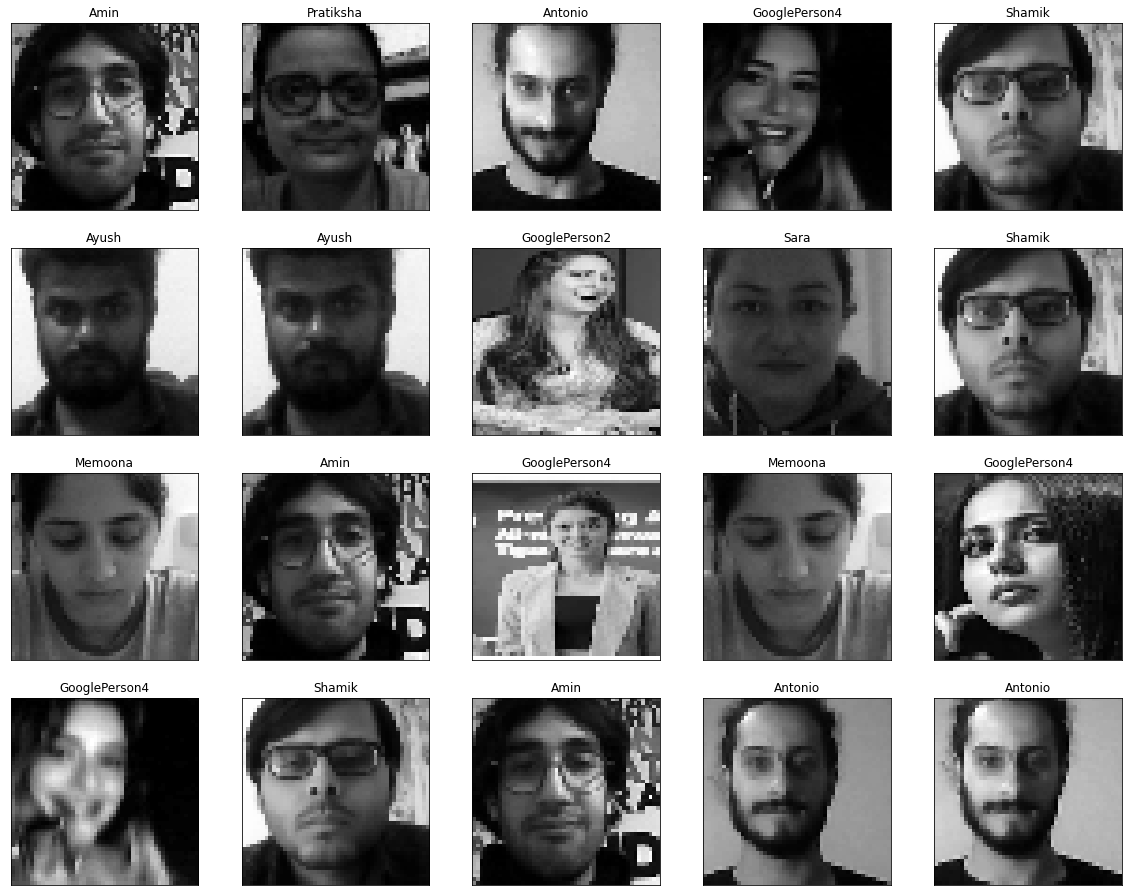

In [37]:
import matplotlib.pyplot as plt
import random

pred_list =[]
fig = plt.figure(figsize=(20,20))
random_numbers = random.sample(range(0, len(Vdata)), 20)

for num, data in enumerate(Vdata):
    img_data = data[0]
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]    
    res_pos = np.argmax(model_out)
    my_label = people_list[res_pos] 
    pred_list.append(my_label)
    if num in random_numbers:
        y = fig.add_subplot(5,5, random_numbers.index(num)+1)
        image = img_data
        
    
        y.imshow(image, cmap='gray')

        plt.title(my_label)
    
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)  
    
    
plt.show()



#### Evaluation

correct_label shape: 240
pred_list shape: 240


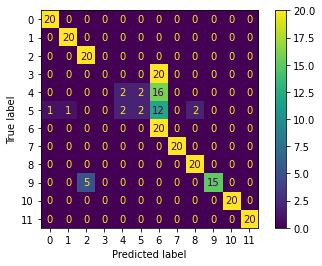

In [40]:
import matplotlib.pyplot as plt

from sklearn import metrics

print('correct_label shape:', len(correct_label))
print('pred_list shape:', len(pred_list))



confusion_matrix = metrics.confusion_matrix(correct_label, pred_list)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=[False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)


cm_display.plot()
plt.show()
# plt.title("Confusion Matrix")

#### Here we can compare the correct and the predicted values of the people

## Scope of Improvement

#### Here we noticed that the GooglePerson1's all images were wrong in the predicted set. The model confused with the person's face with GooglePerson4's images. 

In [46]:
true_pos = np.diag(confusion_matrix)
false_pos = np.sum(confusion_matrix, axis=0) - true_pos
false_neg = np.sum(confusion_matrix, axis=1) - true_pos

In [47]:
precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)

C:\Users\singh\AppData\Local\Temp\ipykernel_10272\715299745.py:1: RuntimeWarning: invalid value encountered in true_divide
  precision = true_pos / (true_pos + false_pos)


In [48]:
print(precision)
# here we can see the class wise presision

[0.95238095 0.95238095 0.8               nan 0.5        0.5
 0.29411765 1.         0.90909091 1.         1.         1.        ]


In [49]:
print(recall)
# below are the class wise recall of the people

[1.   1.   1.   0.   0.1  0.1  1.   1.   1.   0.75 1.   1.  ]


In [50]:
from sklearn import metrics

accuracy= metrics.accuracy_score(correct_label, pred_list)
print(accuracy)

0.7458333333333333


### ACCURACY = 74%